In [1]:
%config InlineBackend.figure_formats = ['svg']
import oscovida as ov

In [2]:
ov.display_binder_link("tutorial-acessing-cases-and-deaths.ipynb")

[Execute this notebook with Binder](https://mybinder.org/v2/gh/oscovida/binder/master?filepath=ipynb/tutorial-acessing-cases-and-deaths.ipynb)

# OSCOVIDA Tutorial:
# Loading COVID19 data on cases and infections for a country

The main function to access numbers of infections and deaths as a function of time is `get_country_data`. Here are some examples:

In [3]:
cases, deaths, label = ov.get_country_data("Italy")

We now have a Pandas Series object with the `cases` and the `deaths`:

In [4]:
cases

2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2020-07-02    240961
2020-07-03    241184
2020-07-04    241419
2020-07-05    241611
2020-07-06    241819
Freq: D, Name: Italy cases, Length: 167, dtype: object

In [5]:
deaths

2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2020-07-02    34818
2020-07-03    34833
2020-07-04    34854
2020-07-05    34861
2020-07-06    34869
Freq: D, Name: Italy deaths, Length: 167, dtype: object

The third return value, here called `label`, is a string that can be used to describe the data - for example if multiple data sets should be plotted together:

In [6]:
label

'Italy'

As a quick check, we can plot the cumulative numbers we have retrieved:

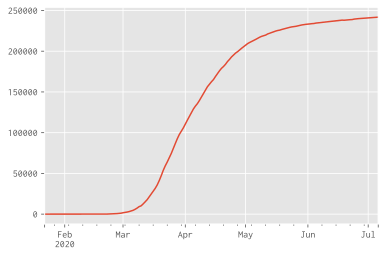

In [7]:
cases.plot()

Or, if we are interested in the changes from day to day (i.e. to see the new infection per day as a function of time), we can use the `diff()` function that is provided for the Series object:

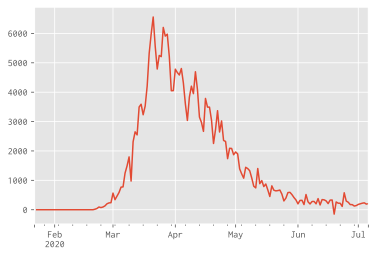

In [8]:
cases.diff().plot()

# Regional information within countries

For some countries, such as Germany and the US, further regional information is available:

## Germany

In Germany, there is a two-level subclassification: there are 16 Bundeslaender (called `regions` in oscovida) and for each Bundesland there are many Landkreise (called 'subregions' in oscovida). 

Here is how to retrieve such data, for example for the Bundesland Schleswig-Holstein:

In [9]:
cases, deaths, label = ov.get_country_data("Germany", region="Schleswig-Holstein")

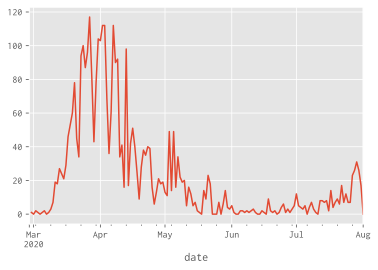

In [10]:
cases.diff().plot()

To retrieve data for a Landkreis, we can use this notation: (It is not necessary to specify the region here, as the subregions within Germany are unique)

In [11]:
cases, deaths, label = ov.get_country_data("Germany", subregion="LK Pinneberg")

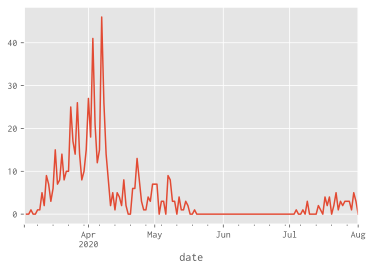

In [12]:
cases.diff().plot()

To get a list of regions in Germany, we can use:

In [13]:
germany = ov.fetch_data_germany()
list(set(germany['Bundesland'].values))

['Bayern',
 'Hamburg',
 'Mecklenburg-Vorpommern',
 'Niedersachsen',
 'Thüringen',
 'Saarland',
 'Baden-Württemberg',
 'Nordrhein-Westfalen',
 'Rheinland-Pfalz',
 'Sachsen',
 'Sachsen-Anhalt',
 'Hessen',
 'Schleswig-Holstein',
 'Berlin',
 'Bremen',
 'Brandenburg']

To get a list of Landkreise, we can use

In [14]:
germany = ov.fetch_data_germany()
sorted(germany['Bundesland'].drop_duplicates())

['Baden-Württemberg',
 'Bayern',
 'Berlin',
 'Brandenburg',
 'Bremen',
 'Hamburg',
 'Hessen',
 'Mecklenburg-Vorpommern',
 'Niedersachsen',
 'Nordrhein-Westfalen',
 'Rheinland-Pfalz',
 'Saarland',
 'Sachsen',
 'Sachsen-Anhalt',
 'Schleswig-Holstein',
 'Thüringen']

Similarly, to find the Landkreise, we can use:

In [15]:
germany = ov.fetch_data_germany()
sorted(germany['Landkreis'].drop_duplicates())

['LK Ahrweiler',
 'LK Aichach-Friedberg',
 'LK Alb-Donau-Kreis',
 'LK Altenburger Land',
 'LK Altenkirchen',
 'LK Altmarkkreis Salzwedel',
 'LK Altötting',
 'LK Alzey-Worms',
 'LK Amberg-Sulzbach',
 'LK Ammerland',
 'LK Anhalt-Bitterfeld',
 'LK Ansbach',
 'LK Aschaffenburg',
 'LK Augsburg',
 'LK Aurich',
 'LK Bad Dürkheim',
 'LK Bad Kissingen',
 'LK Bad Kreuznach',
 'LK Bad Tölz-Wolfratshausen',
 'LK Bamberg',
 'LK Barnim',
 'LK Bautzen',
 'LK Bayreuth',
 'LK Berchtesgadener Land',
 'LK Bergstraße',
 'LK Bernkastel-Wittlich',
 'LK Biberach',
 'LK Birkenfeld',
 'LK Bitburg-Prüm',
 'LK Bodenseekreis',
 'LK Borken',
 'LK Breisgau-Hochschwarzwald',
 'LK Burgenlandkreis',
 'LK Böblingen',
 'LK Börde',
 'LK Calw',
 'LK Celle',
 'LK Cham',
 'LK Cloppenburg',
 'LK Coburg',
 'LK Cochem-Zell',
 'LK Coesfeld',
 'LK Cuxhaven',
 'LK Dachau',
 'LK Dahme-Spreewald',
 'LK Darmstadt-Dieburg',
 'LK Deggendorf',
 'LK Diepholz',
 'LK Dillingen a.d.Donau',
 'LK Dingolfing-Landau',
 'LK Dithmarschen',
 'LK 

Note that the Landkreise (LK) which are a Stadt, are labelled with `SK` in the beginning - presumably for Stadtkreis.

## United States

For the United States, we have the states available:

In [16]:
cases, deaths, label = ov.get_country_data("US", "California")

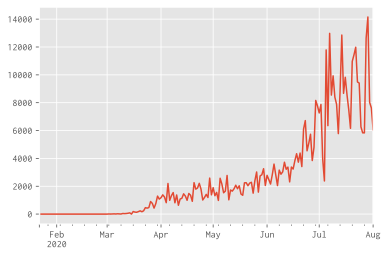

In [17]:
cases.diff().plot()

To get a list of available states, we can use

In [18]:
us_cases = ov.fetch_cases_US()
sorted(us_cases['Province_State'].drop_duplicates())

['Alabama',
 'Alaska',
 'American Samoa',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Diamond Princess',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Grand Princess',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Northern Mariana Islands',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

## Hungary


For Hungary, more regional data is available for the following regions:

In [19]:
ov.get_counties_hungary()

['Bács-Kiskun',
 'Baranya',
 'Békés',
 'Borsod-Abaúj-Zemplén',
 'Budapest',
 'Csongrád',
 'Fejér',
 'Győr-Moson-Sopron',
 'Hajú-Bihar',
 'Heves',
 'Jász-Nagykun-Szolnok',
 'Komárom-Esztergom',
 'Nógrád',
 'Pest',
 'Somogy',
 'Szabolcs-Szatmár-Bereg',
 'Tolna',
 'Vas',
 'Veszprém',
 'Zala']

As before, the get_country_data function can be used:

In [20]:
cases, deaths, label = ov.get_country_data("Hungary", region="Baranya")

In [21]:
cases

Dátum
2020-03-31    20
2020-04-01    19
2020-04-02    19
2020-04-03    21
2020-04-04    21
              ..
2020-07-23    41
2020-07-24    41
2020-07-25    41
2020-07-26    41
2020-07-27    41
Freq: D, Name: Hungary-Baranya cases, Length: 119, dtype: int64

However, no data on deaths is available for Hungary, so the `deaths` object is just a `None` object:

In [22]:
deaths

In [23]:
label

'Hungary-Baranya'

# Other tutorials

You can find more tutorials on [this page with name 0-tutorial-index.ipynb](0-tutorial-index.ipynb)